# Loan Prediction using Machine Learning

### In this project, we will predict whether a customer will get the loan from bank or not.

Following Factors are:
1. Gender
2. Education
3. Marrital status
4. Loand Amount
5. Credit History
6. Account Balance
7. Property Area
8. Credit History
9. Dependants
10. Self Employment Status

There are more factors also, let see in this notebook

In [21]:
import pandas as pd
import numpy as np
import os
os.chdir('D:\RUSHI\Projects\Streamlit_Bank_Loan_Prediction-master\Streamlit_Bank_Loan_Prediction-master\Loan_Data')

In [22]:
## Pandas
## Numpy
## SKlearn
## Matplotlib

In [23]:
train=pd.read_csv('D:\RUSHI\Projects\Streamlit_Bank_Loan_Prediction-master\Streamlit_Bank_Loan_Prediction-master\Loan_Data/train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

## Check the missing Values in data

In [24]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Preprocessing on the data

In [25]:
#Loan_status=train.Loan_Status
#train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv('D:\RUSHI\Projects\Streamlit_Bank_Loan_Prediction-master\Streamlit_Bank_Loan_Prediction-master\Loan_Data/test.csv')
Loan_ID=test.Loan_ID
data=train.append(test)
data.head()

C:\Users\rushi\AppData\Local\Temp\ipykernel_6620\341049720.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=train.append(test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0


In [26]:
data.shape

(981, 13)

In [27]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,981.000000,981.000000,954.000000,961.000000,902.000000,614.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920,0.687296
std,5695.104533,2718.772806,77.421743,65.100602,0.370553,0.463973
min,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [28]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [29]:
data.Dependents.dtypes

dtype('O')

C:\Users\rushi\AppData\Local\Temp\ipykernel_6620\2566939005.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<AxesSubplot: >

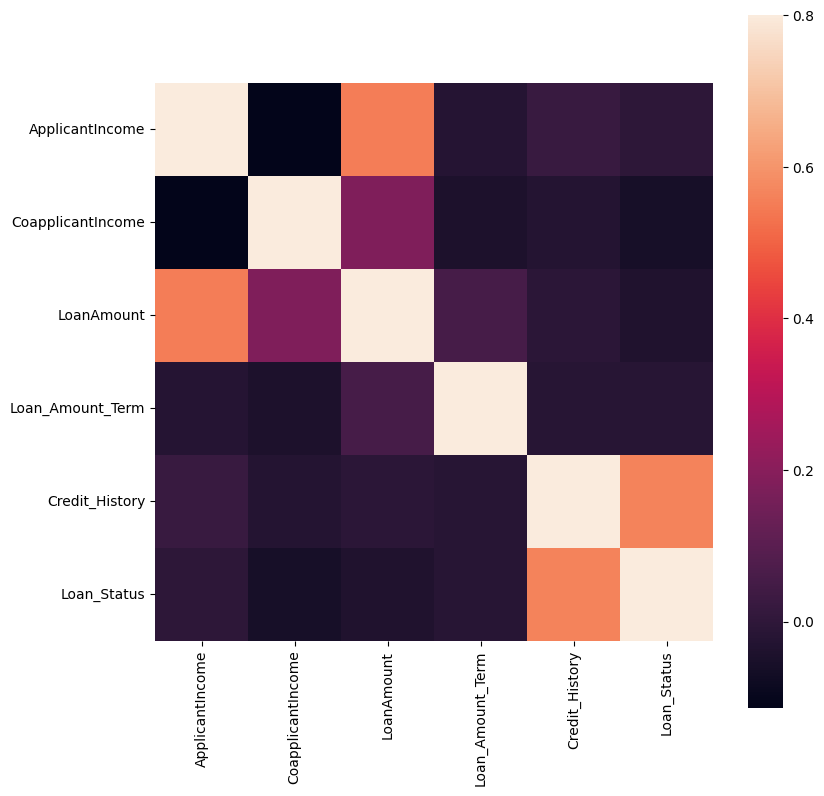

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

## Label ENcode

In [31]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

C:\Users\rushi\AppData\Local\Temp\ipykernel_6620\348716590.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<AxesSubplot: >

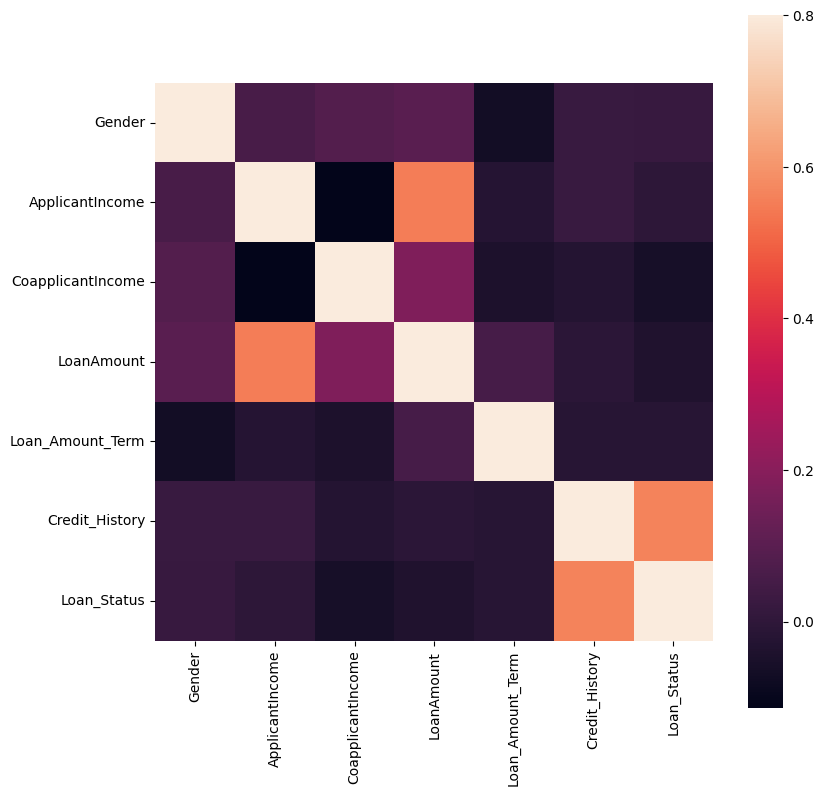

In [32]:
## Let's see correlations
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [33]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [34]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [35]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [36]:
data.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

C:\Users\rushi\AppData\Local\Temp\ipykernel_6620\4205823728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<AxesSubplot: >

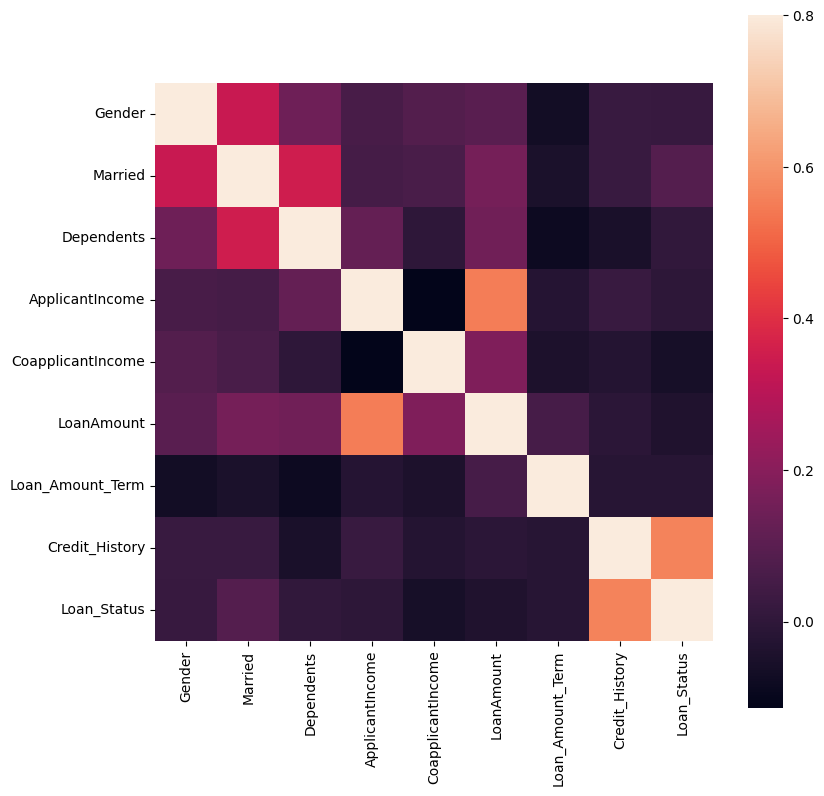

In [37]:
## Let's see correlations for it
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [38]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [39]:
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [40]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [41]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [42]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [43]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [44]:
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

C:\Users\rushi\AppData\Local\Temp\ipykernel_6620\3232571843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<AxesSubplot: >

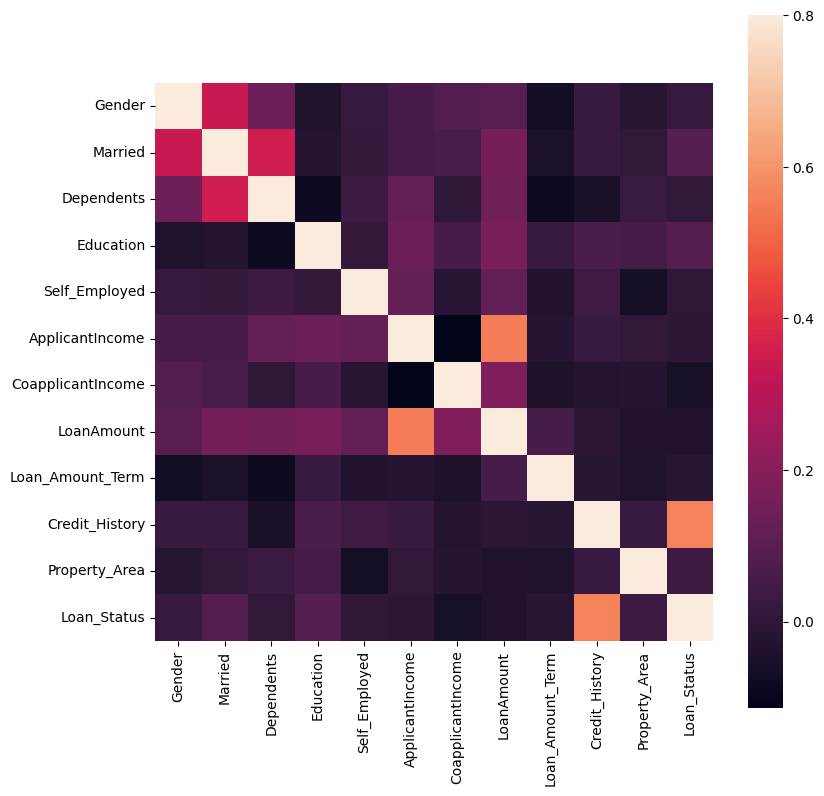

In [45]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [46]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1.0


In [47]:
data.Credit_History.size

981

## It's time to fill the missing values

In [48]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [49]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [50]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [51]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [52]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [53]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [54]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [55]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [56]:
## Filling Gender with random number between 0-2
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [57]:
data.Gender.value_counts()

1.0    775
0.0    206
Name: Gender, dtype: int64

In [58]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [59]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

C:\Users\rushi\AppData\Local\Temp\ipykernel_6620\3232571843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<AxesSubplot: >

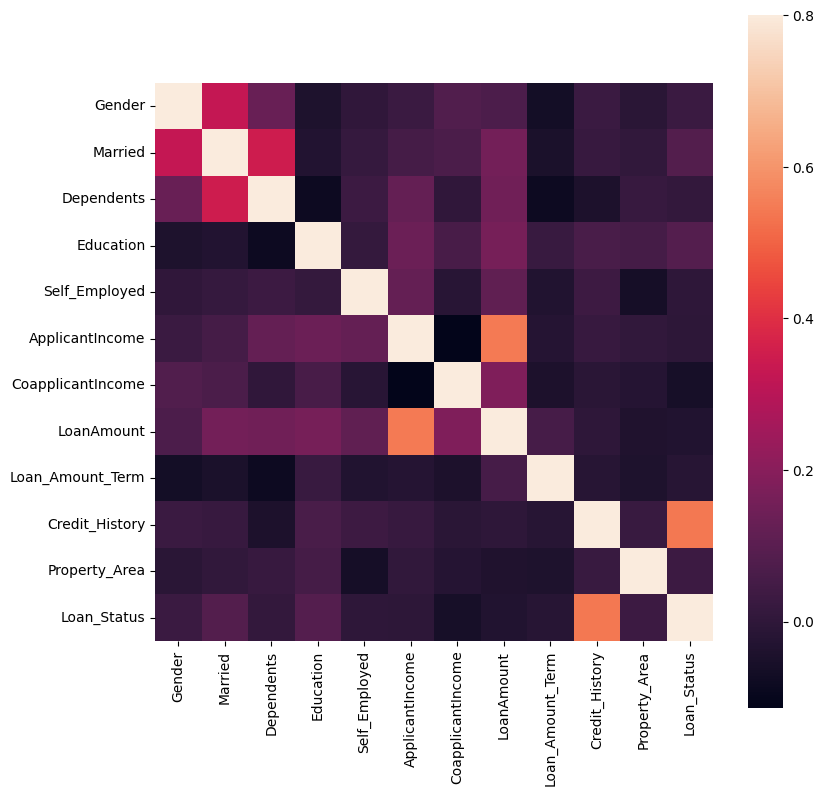

In [60]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [61]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [62]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [63]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2,1.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1.0


In [64]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [65]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [66]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2,1.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1.0


## Split the Data into X & Y

In [67]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [68]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [69]:
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2,1.0
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0,1.0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0,1.0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2,1.0
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2,1.0


In [70]:
# train_X.head()

In [71]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1,1.0
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1,0.0
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2,1.0
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2,0.0
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1,1.0


## Using Different types of Machine Learning Model

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Fit the all ML Models

In [92]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [74]:
scoring='accuracy'

In [75]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [91]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=0)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.9935064935064936
[[ 42   1]
 [  0 111]]
              precision    recall  f1-score   support

           N       1.00      0.98      0.99        43
           Y       0.99      1.00      1.00       111

    accuracy                           0.99       154
   macro avg       1.00      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
print(pred)

['Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N']


In [95]:
X_test=data.iloc[614:,] 
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [96]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2,NaN
1,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2,NaN
2,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2,NaN
3,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,1.0,2,NaN
4,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2,NaN


In [97]:
prediction = LR.predict(X_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(prediction)

[1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1]


In [ ]:
## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

In [ ]:
print(t)

[1]


In [ ]:
import pickle
# now you can save it to a file
file = './Model/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(svc, f)

In [ ]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [ ]:
cy = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

[1]
